# Objetivo

*Limpieza y preprocesado de la base de datos **df_bwm***

El df tiene un total de 4843 filas y 18 columnas, las columnas representan diferentes características de vehículos.
Las características incluyen la marca, el modelo, los kilómetros recorridos (km), la potencia, la fecha de registro, el tipo de gasolina, el color, el tipo de coche, si el volante es regulable, si tiene aire acondicionado, si tiene cámara trasera, si los asientos traseros son plegables, si tiene elevalunas eléctrico, si tiene Bluetooth, si tiene GPS, si tiene alerta de límite de velocidad, el precio y la fecha de venta.
Los tipos de datos incluyen string, floats y bools.

# Librerías

In [581]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

# inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [582]:
df_bmw = pd.read_csv('C:/Users/aalei/Desktop/entregable_1/bmw_pricing_v3.csv')
print("Filas: ", df_bmw.shape[0], "Columnas: ",df_bmw.shape[1])
df_bmw.head(3)

Filas:  4843 Columnas:  18


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01


# Análisis Exploratorio EDA

In [583]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [584]:
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [585]:
for col in df_bmw.columns:
    print(df_bmw[col].unique(), "\n")

[nan 'BMW'] 

['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 nan '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3'
 'M550' '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé'
 'i3' '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 

[140411.  13929. 183297. ...  19633.  27920. 195840.] 

[100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210.  nan 122. 200.
  90. 150. 141. 173. 137. 280. 112. 189.  80

## Corrección de los formatos

In [586]:
#Corrección formatos de las variables de fechas a datetime
for i in (df_bmw.loc[:, ['fecha_registro','fecha_venta']]):
    df_bmw[i]= pd.to_datetime(df_bmw[i])  
print(df_bmw['fecha_registro'].info(),df_bmw['fecha_venta'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 4843 entries, 0 to 4842
Series name: fecha_registro
Non-Null Count  Dtype         
--------------  -----         
2420 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 4843 entries, 0 to 4842
Series name: fecha_venta
Non-Null Count  Dtype         
--------------  -----         
4842 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.0 KB
None None


In [587]:
#Cambio formato a bool de las variables que estan en dtype 'objet' pero tienen valores True o False
for col in (df_bmw.loc[:, ['volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad']]):
    df_bmw[col] = df_bmw[col].astype(bool)
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4843 non-null   bool          
 9   aire_acondicionado           4843 non-null   bool          
 10  camara_trasera               4843 non-null   bool          
 11  asientos_traseros_plegables  4843 non-null 

## Distribución del target 'Precio'

In [588]:
#Defino las variables target y variables features
target = 'precio'
features = df_bmw.columns[df_bmw.columns!=target]

# Divide dataset en matriz de variables (X) y target (y)
X = df_bmw[features]
y = df_bmw[target]

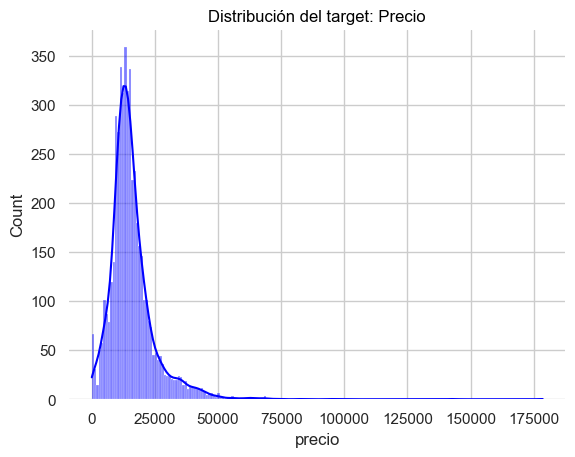

In [589]:
#Distribucion target
sns.histplot(y, kde=True, color='blue')
plt.title('Distribución del target: Precio', fontsize=12, color='black')
sns.despine(left=True, bottom=True)
plt.show()

## Distribución de las variables Numéricas

In [590]:
# Se dividen las variables en categoricas, numéricas y booleanas
var_cat = df_bmw.select_dtypes(include=['object']).columns.tolist()
var_num = df_bmw.select_dtypes(include=['int', 'float']).columns.tolist()
var_bool = df_bmw.select_dtypes(include=['bool']).columns.tolist()
len(var_cat) + len(var_num) + len(var_bool)

16

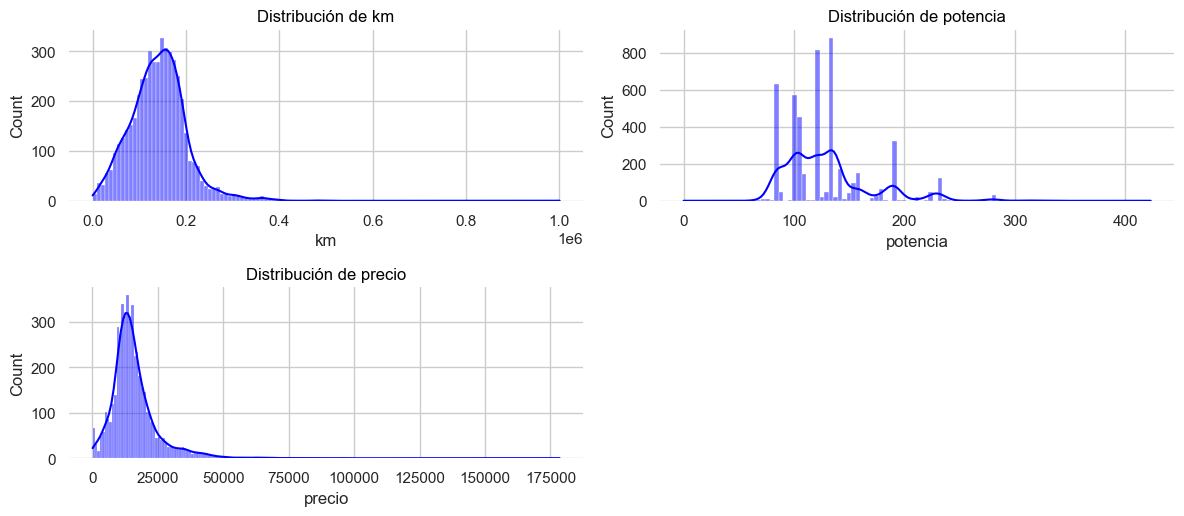

In [591]:
#Se imprime un histograma para las numéricas
plt.figure(figsize=(12, 10))
for i, variable in enumerate(var_num, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_bmw[variable], kde=True, color='blue')
    plt.title(f'Distribución de {variable}', fontsize=12, color='black')
    sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## Distribución de las variables Booleanas

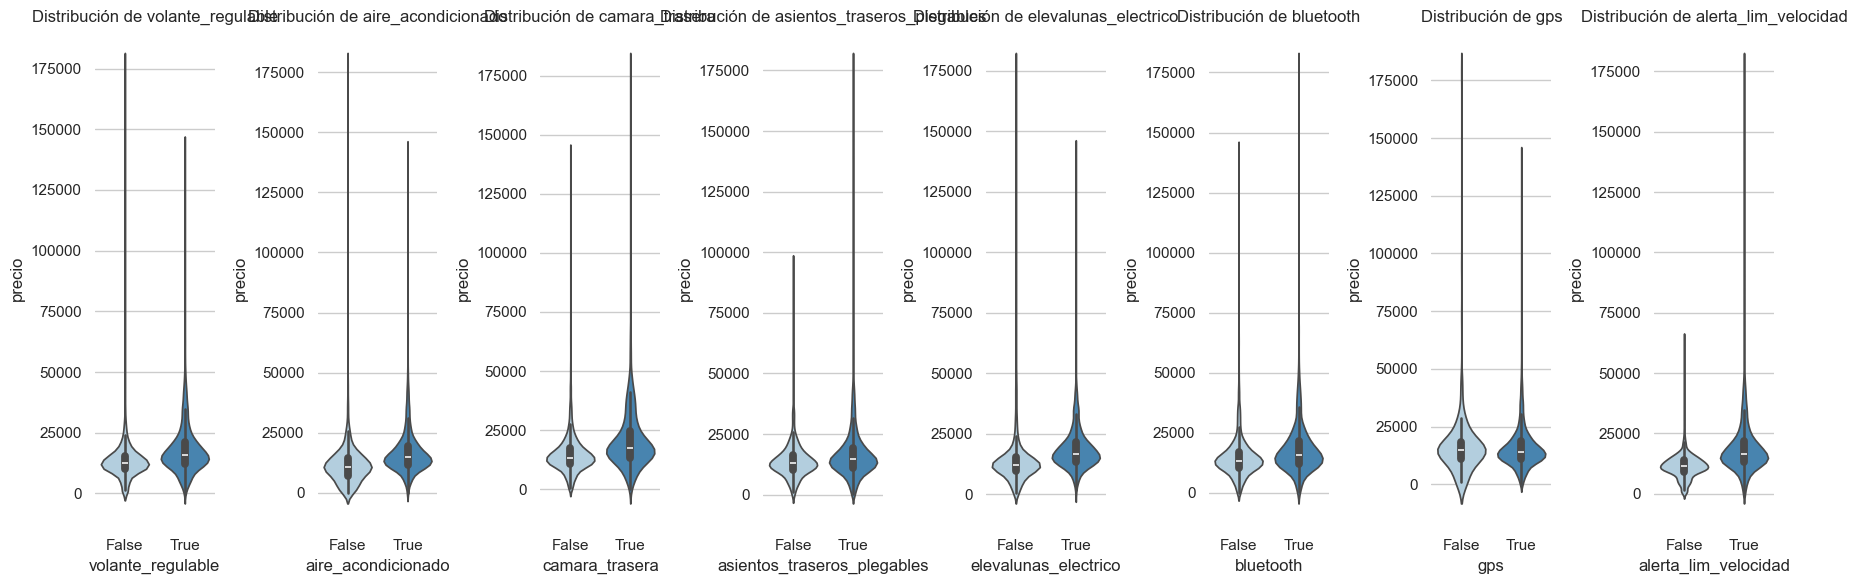

In [592]:
#Se imprimen violinplot para las variables booleanas
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

for i, variable in enumerate(var_bool, 1):
    plt.subplot(1, 8, i)
    sns.violinplot(x=variable, y="precio", data=df_bmw, palette="Blues")
    plt.title(f'Distribución de {variable}', fontsize=12)
    sns.despine(left=True, bottom=True)
    
plt.tight_layout()
plt.show()

## Distribución del target versus el resto de variables

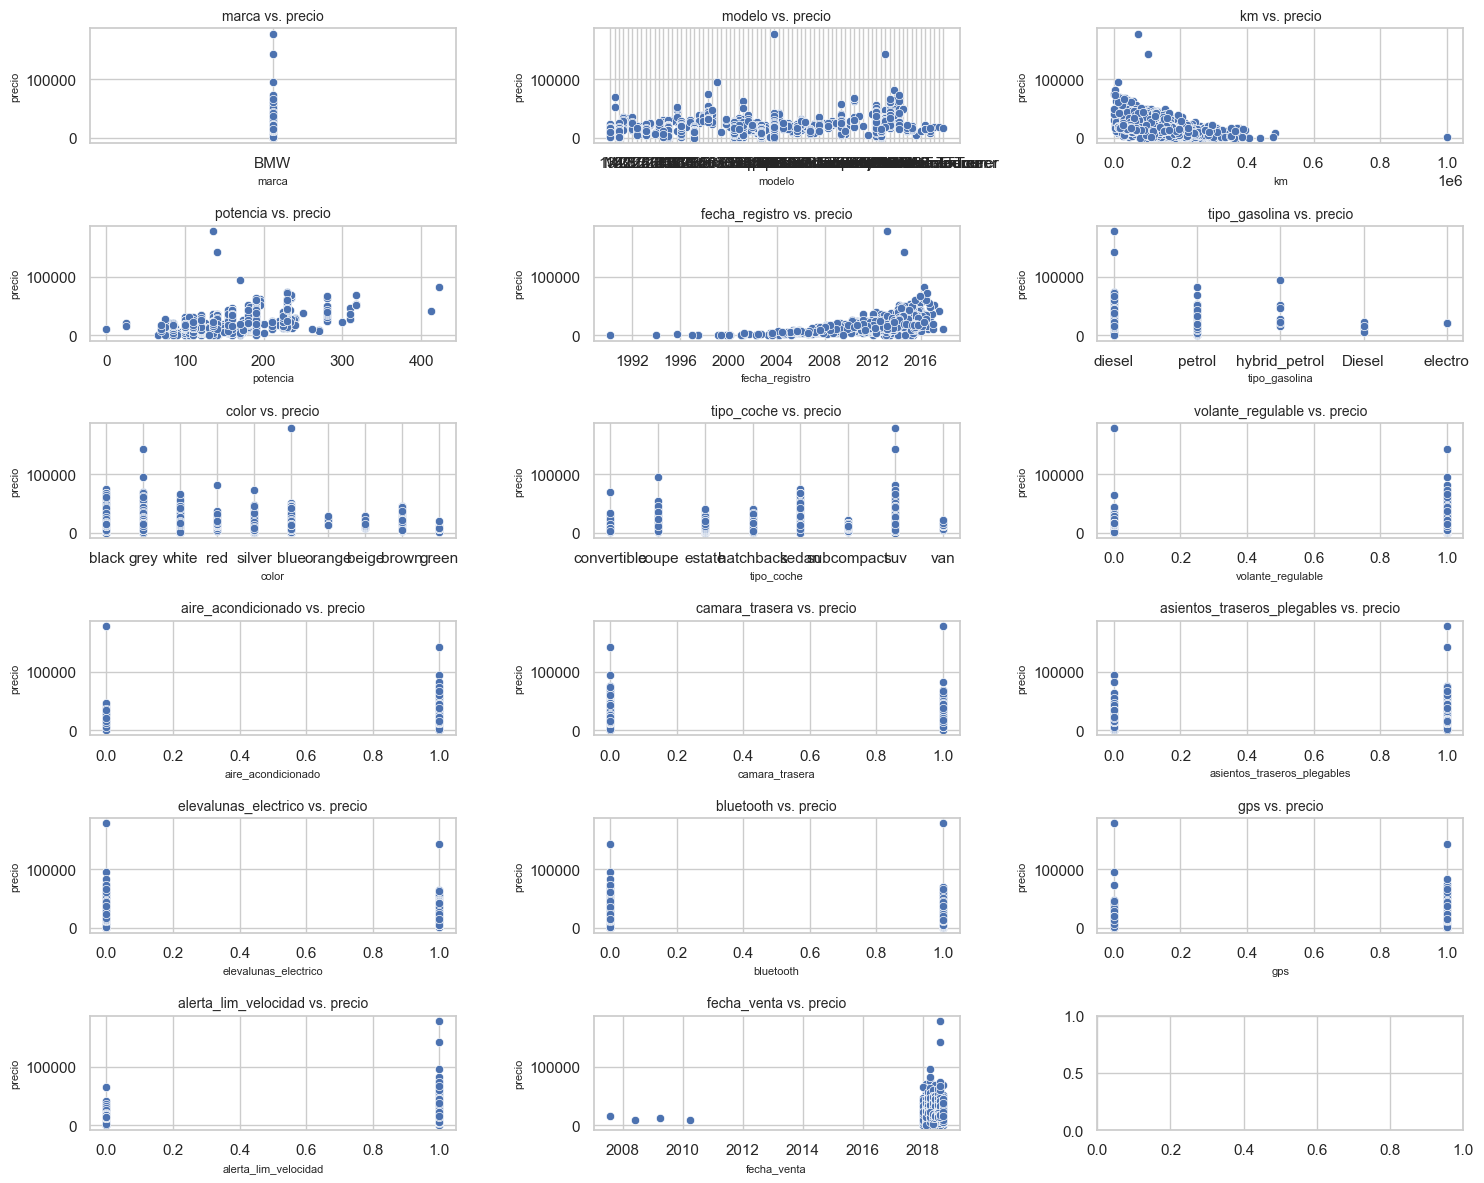

In [593]:
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

plt.subplots_adjust(hspace=0.5)
for i, feature in enumerate(X.columns):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=X[feature], y=y, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. {target}', fontsize=10)
    axes[row, col].set_xlabel(feature, fontsize=8)
    axes[row, col].set_ylabel(target, fontsize=8)

plt.tight_layout()
plt.show()

# ML Preprocessing

## Data cleaning

### 1. Eliminar Columnas Irrelevantes

In [594]:
#Se eliminan columnas con valor único
del(df_bmw['marca'])
df_bmw.head(1)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2018-01-01


In [595]:
# Fecha registro se convierte en año_registro
df_bmw['año_registro']=df_bmw['fecha_registro'].dt.year
del(df_bmw['fecha_registro'])
# Fecha venta se convierte en año_venta
df_bmw['año_venta']=df_bmw['fecha_venta'].dt.year
del(df_bmw['fecha_venta'])

### 2. Tratamiento de Valores atípicos

In [596]:
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,NaN,2018.0


In [597]:
# Checkear valores atípicos en la variable km
print("Min km: ", df_bmw['km'].min(), "Max km: ", df_bmw['km'].max())
df_bmw[df_bmw['km']<0]

Min km:  -64.0 Max km:  1000376.0


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,NaN,2018.0


In [598]:
# Eliminar el valor de km menor que 0
df_bmw.drop(df_bmw[(df_bmw['km'] <0)].index, inplace=True)

In [599]:
# Checkear valores atipicos en la variable potencia
df_bmw[df_bmw['potencia']== 0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,False,True,11700.0,2014.0,2018.0


In [600]:
# Buscar la moda de potencia para luego reemplazar
df_bmw[(df_bmw['modelo']=='X1')&(df_bmw['tipo_gasolina']=='diesel')&(df_bmw['tipo_coche']=='suv')]['potencia'].mode()

0    105.0
Name: potencia, dtype: float64

In [601]:
# Reemplazar el valor de potencia 0 por la moda (105)
df_bmw['potencia'] = df_bmw['potencia'].replace(0, 105)
print("Min potencia: ", df_bmw['potencia'].min(), "Max potencia: ", df_bmw['potencia'].max())

Min potencia:  25.0 Max potencia:  423.0


In [602]:
# Checkear valores atípicos en la variable tipo_gasolina:
df_bmw['tipo_gasolina'].unique()

array(['diesel', 'petrol', nan, 'hybrid_petrol', 'Diesel', 'electro'],
      dtype=object)

In [603]:
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].replace('Diesel', 'diesel')
df_bmw['tipo_gasolina'].unique()

array(['diesel', 'petrol', nan, 'hybrid_petrol', 'electro'], dtype=object)

In [604]:
df_bmw['color'].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', nan, 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [605]:
df_bmw['tipo_coche'].unique()

array([nan, 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [606]:
print("Precio mínimo: ", df_bmw['precio'].min(), "Precio máximo: ", df_bmw['precio'].max())

Precio mínimo:  100.0 Precio máximo:  178500.0


### 3. Eliminar duplicados

In [607]:
df_bmw.duplicated().sum()

0

### 4. Tratamiento de Valores nulos

In [608]:
# Eliminar Nulos en el target 'precio'
df_bmw.dropna(subset=['precio'], inplace=True)

In [609]:
# Eliminar nulos de la columna 'modelo'
df_bmw.dropna(subset=['modelo'], inplace=True)

In [610]:
df_bmw.isnull().sum()

modelo                            0
km                                2
potencia                          1
tipo_gasolina                     5
color                           444
tipo_coche                     1456
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
año_registro                   2415
año_venta                         1
dtype: int64

In [611]:
# Nulos año_registro 2418
# Se crea un diccionario con la moda del año de registro para cada modelo
df_bmw_modelo = df_bmw.groupby(['modelo'])['año_registro'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
print(df_bmw_modelo)
df_bmw.head(2)

{' Active Tourer': 2014.0, '114': 2013.0, '116': 2013.0, '118': 2012.0, '120': 2013.0, '123': nan, '125': 2013.0, '135': 2013.0, '214 Gran Tourer': 2015.0, '216': nan, '216 Active Tourer': 2015.0, '216 Gran Tourer': 2015.0, '218': 2014.0, '218 Active Tourer': 2015.0, '218 Gran Tourer': 2015.0, '220': 2015.0, '220 Active Tourer': 2015.0, '225': nan, '225 Active Tourer': nan, '316': 2013.0, '318': 2013.0, '318 Gran Turismo': 2014.0, '320': 2013.0, '320 Gran Turismo': 2014.0, '325': 2011.0, '325 Gran Turismo': 2014.0, '328': 2012.0, '330': 2013.0, '330 Gran Turismo': 2014.0, '335': 2011.0, '335 Gran Turismo': 2014.0, '418 Gran Coupé': 2014.0, '420': 2014.0, '420 Gran Coupé': 2014.0, '425': nan, '430': 2014.0, '430 Gran Coupé': 2015.0, '435': 2014.0, '435 Gran Coupé': 2015.0, '518': 2014.0, '520': 2013.0, '520 Gran Turismo': 2013.0, '523': 2000.0, '525': 2012.0, '528': 2015.0, '530': 2014.0, '530 Gran Turismo': 2013.0, '535': 2012.0, '535 Gran Turismo': nan, '630': nan, '635': 2010.0, '640

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,NaN,2018.0


In [612]:
df_bmw['año_registro'] = df_bmw.apply(lambda row: df_bmw_modelo[row['modelo']] if pd.isnull(row['año_registro']) else row['año_registro'], axis=1)
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [613]:
# Eliminar Nulos restantes de año_Registro(18) y año venta (1)
df_bmw.dropna(subset=['año_registro', 'año_venta'], inplace=True)
print("Nulos año_registro: ", df_bmw['año_registro'].isnull().sum(), "Nulos añño_venta: ", df_bmw['año_venta'].isnull().sum())

Nulos año_registro:  0 Nulos añño_venta:  0


In [614]:
# Nulos en variable 'tipo_coche'
df_bmw_tipo_coche = df_bmw.groupby(['modelo'])['tipo_coche'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
print(df_bmw_tipo_coche)
df_bmw.head(2)

{' Active Tourer': 'van', '114': 'hatchback', '116': 'hatchback', '118': 'hatchback', '120': 'hatchback', '125': 'hatchback', '135': 'hatchback', '214 Gran Tourer': 'van', '216 Active Tourer': 'van', '216 Gran Tourer': 'van', '218': 'convertible', '218 Active Tourer': 'van', '218 Gran Tourer': 'van', '220': 'convertible', '220 Active Tourer': 'van', '316': 'sedan', '318': 'estate', '318 Gran Turismo': 'hatchback', '320': 'estate', '320 Gran Turismo': 'hatchback', '325': 'estate', '325 Gran Turismo': 'hatchback', '328': 'estate', '330': 'estate', '330 Gran Turismo': 'hatchback', '335': 'coupe', '335 Gran Turismo': 'hatchback', '418 Gran Coupé': 'hatchback', '420': 'coupe', '420 Gran Coupé': 'hatchback', '430': 'coupe', '430 Gran Coupé': 'hatchback', '435': 'coupe', '435 Gran Coupé': 'hatchback', '518': 'sedan', '520': 'estate', '520 Gran Turismo': 'hatchback', '523': 'estate', '525': 'estate', '528': 'sedan', '530': 'estate', '530 Gran Turismo': 'hatchback', '535': 'sedan', '635': 'coup

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [615]:
# Reemplazar los nulos en 'tipo_coche' por la moda
df_bmw['tipo_coche'] = df_bmw.apply(lambda row: df_bmw_tipo_coche[row['modelo']] if pd.isnull(row['tipo_coche']) else row['tipo_coche'], axis=1)
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [616]:
print("Nulos tipo_coche: ", df_bmw['tipo_coche'].isnull().sum())

Nulos tipo_coche:  0


In [617]:
# Nulos en variable 'color'
df_bmw_color = df_bmw.groupby(['modelo'])['color'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
print(df_bmw_color)
df_bmw.head(2)

{' Active Tourer': 'black', '114': 'black', '116': 'black', '118': 'black', '120': 'blue', '125': 'black', '135': 'white', '214 Gran Tourer': 'red', '216 Active Tourer': 'black', '216 Gran Tourer': 'blue', '218': 'grey', '218 Active Tourer': 'black', '218 Gran Tourer': 'black', '220': 'white', '220 Active Tourer': 'grey', '316': 'grey', '318': 'black', '318 Gran Turismo': 'black', '320': 'black', '320 Gran Turismo': 'black', '325': 'blue', '325 Gran Turismo': 'black', '328': 'blue', '330': 'grey', '330 Gran Turismo': 'beige', '335': 'black', '335 Gran Turismo': 'grey', '418 Gran Coupé': 'black', '420': 'black', '420 Gran Coupé': 'black', '430': 'black', '430 Gran Coupé': 'black', '435': 'white', '435 Gran Coupé': 'blue', '518': 'black', '520': 'grey', '520 Gran Turismo': 'black', '523': 'grey', '525': 'black', '528': 'black', '530': 'black', '530 Gran Turismo': 'black', '535': 'black', '635': 'grey', '640': 'blue', '640 Gran Coupé': 'black', '730': 'black', '740': 'black', '750': 'blac

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [618]:
# Reemplazar los nulos en 'tipo_coche' por la moda
df_bmw['color'] = df_bmw.apply(lambda row: df_bmw_color[row['modelo']] if pd.isnull(row['color']) else row['color'], axis=1)
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [619]:
print("Nulos color: ", df_bmw['color'].isnull().sum())

Nulos color:  0


In [620]:
# Tratamiento Nulos de variable 'tipo_gasolina'
df_bmw_tipo_gasolina = df_bmw.groupby(['modelo'])['tipo_gasolina'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
print(df_bmw_tipo_gasolina)
df_bmw.head(2)

{' Active Tourer': 'diesel', '114': 'diesel', '116': 'diesel', '118': 'diesel', '120': 'diesel', '125': 'diesel', '135': 'petrol', '214 Gran Tourer': 'diesel', '216 Active Tourer': 'diesel', '216 Gran Tourer': 'diesel', '218': 'diesel', '218 Active Tourer': 'diesel', '218 Gran Tourer': 'diesel', '220': 'diesel', '220 Active Tourer': 'diesel', '316': 'diesel', '318': 'diesel', '318 Gran Turismo': 'diesel', '320': 'diesel', '320 Gran Turismo': 'diesel', '325': 'diesel', '325 Gran Turismo': 'diesel', '328': 'petrol', '330': 'diesel', '330 Gran Turismo': 'diesel', '335': 'diesel', '335 Gran Turismo': 'diesel', '418 Gran Coupé': 'diesel', '420': 'diesel', '420 Gran Coupé': 'diesel', '430': 'diesel', '430 Gran Coupé': 'diesel', '435': 'diesel', '435 Gran Coupé': 'diesel', '518': 'diesel', '520': 'diesel', '520 Gran Turismo': 'diesel', '523': 'petrol', '525': 'diesel', '528': 'petrol', '530': 'diesel', '530 Gran Turismo': 'diesel', '535': 'diesel', '635': 'diesel', '640': 'diesel', '640 Gran 

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [621]:
# Reemplazar los nulos en 'tipo_gasolina' por la moda
df_bmw['tipo_gasolina'] = df_bmw.apply(lambda row: df_bmw_tipo_gasolina[row['modelo']] if pd.isnull(row['tipo_gasolina']) else row['tipo_gasolina'], axis=1)
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [622]:
# Tratamiento Nulos de variable 'potencia'
df_bmw_potencia = df_bmw.groupby(['modelo'])['potencia'].agg('mean').to_dict()
print(df_bmw_potencia)
df_bmw.head(2)

{' Active Tourer': 100.0, '114': 71.66666666666667, '116': 85.24581005586592, '118': 103.33566433566433, '120': 132.27777777777777, '125': 159.0, '135': 230.0, '214 Gran Tourer': 70.0, '216 Active Tourer': 85.0, '216 Gran Tourer': 85.0, '218': 105.83333333333333, '218 Active Tourer': 105.6923076923077, '218 Gran Tourer': 106.11111111111111, '220': 138.33333333333334, '220 Active Tourer': 140.0, '316': 84.87179487179488, '318': 101.20987654320987, '318 Gran Turismo': 102.01030927835052, '320': 126.10533333333333, '320 Gran Turismo': 133.3835616438356, '325': 157.6315789473684, '325 Gran Turismo': 158.75, '328': 180.0, '330': 186.06060606060606, '330 Gran Turismo': 190.0, '335': 222.14285714285714, '335 Gran Turismo': 230.0, '418 Gran Coupé': 102.5, '420': 132.13953488372093, '420 Gran Coupé': 133.1818181818182, '430': 190.0, '430 Gran Coupé': 190.0, '435': 233.75, '435 Gran Coupé': 227.5, '518': 102.95454545454545, '520': 127.54113924050633, '520 Gran Turismo': 126.52173913043478, '523'

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [623]:
# Reemplazar los nulos en 'potencia' por la moda
df_bmw['potencia'] = df_bmw.apply(lambda row: df_bmw_potencia[row['modelo']] if pd.isnull(row['potencia']) else row['potencia'], axis=1)
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0


In [624]:
# Eliminar Nulos de km
df_bmw.dropna(subset=['km'], inplace=True)
print("Nulos: ", df_bmw.isnull().sum().sum())

Nulos:  0


## Tratamiento de Outlayers

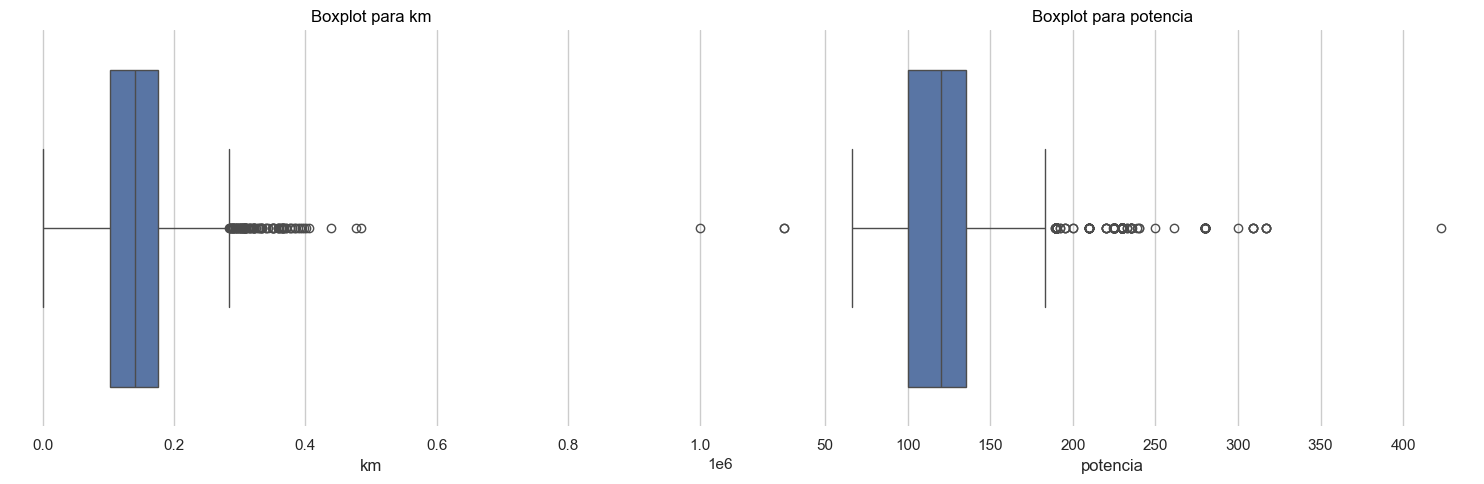

In [627]:
# Crea una figura con tres subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Crea un boxplot para cada columna en su propio subgráfico
for i, column in enumerate(['km', 'potencia']):
    sns.boxplot(x=df_bmw[column], ax=axes[i])
    axes[i].set_title(f'Boxplot para {column}', fontsize=12, color='black')
    sns.despine(ax=axes[i], left=True, bottom=True)

# Ajusta el diseño de la figura
plt.tight_layout()
plt.show()

In [628]:
#Outlayers para la variable km
Q1 = df_bmw['km'].quantile(0.10)
Q3 = df_bmw['km'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_km = df_bmw[(df_bmw['km'] < lower_bound) | (df_bmw['km'] > upper_bound)]
outliers_km

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
557,520,484615.0,120.0,diesel,blue,estate,True,True,False,True,False,True,True,False,8300.0,2011.0,2018.0
2350,318,477571.0,85.0,diesel,grey,estate,False,True,False,True,False,True,False,False,1200.0,2013.0,2018.0
2829,525,439060.0,105.0,diesel,silver,estate,False,False,True,True,False,False,True,False,100.0,2012.0,2018.0
3732,118,1000376.0,90.0,diesel,black,hatchback,True,False,False,False,False,True,True,False,1400.0,2005.0,2018.0


In [629]:
# Elimina las filas donde la variable 'km' es mayor que 500000
df_bmw.drop(df_bmw[df_bmw['km'] > 439000].index, inplace=True)

In [630]:
#Outlayers para la variable potencia
Q1 = df_bmw['potencia'].quantile(0.10)
Q3 = df_bmw['potencia'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_potencia = df_bmw[(df_bmw['potencia'] < lower_bound) | (df_bmw['potencia'] > upper_bound)]
outliers_potencia

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
4146,X6 M,2970.0,423.0,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,2016.0,2018.0


In [631]:
# Elimina las filas donde la variable 'potencia' es mayor que 350
df_bmw.drop(df_bmw[df_bmw['potencia'] > 420].index, inplace=True)

## Feature engineering

In [632]:
#Se crea la columna antiguedad_coche:
df_bmw['antiguedad_coche'] = df_bmw['año_venta'] - df_bmw['año_registro']
df_bmw.head(2)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta,antiguedad_coche
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0,6.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0,3.0


In [633]:
# Eliminar los valores de antiguedad_coche menores que 0
df_bmw.drop(df_bmw[(df_bmw['antiguedad_coche'] <0)].index, inplace=True)
print("Antiguedad min: ", df_bmw['antiguedad_coche'].min(), "Antiguedad max: ", df_bmw['antiguedad_coche'].max())

Antiguedad min:  1.0 Antiguedad max:  28.0


In [634]:
#Se agrupan algunos elementos comunes de las variables tipo_coche, colores y modelo.
otros_hibrido_electro=['hybrid_petrol','electro']
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].replace(otros_hibrido_electro, 'hibrido o electro')
print(df_bmw['tipo_gasolina'].value_counts())

tipo_gasolina
diesel               4613
petrol                180
hibrido o electro      10
Name: count, dtype: int64


In [635]:
#Se agrupan algunos elementos comunes de la variable modelo.
otros_tipo_coche=['coupe','subcompact','convertible','van']
df_bmw['tipo_coche'] = df_bmw['tipo_coche'].replace(otros_tipo_coche, 'otro_tipo')
print(df_bmw['tipo_coche'].value_counts())

tipo_coche
estate       1810
suv          1058
sedan         950
hatchback     747
otro_tipo     238
Name: count, dtype: int64


In [636]:
#se agrupan los colores red, beige, green y orange
otros_colores=['red','beige','green','orange']
df_bmw['color'] = df_bmw['color'].replace(otros_colores, 'otro_color')
print(df_bmw['color'].value_counts())

color
black         1833
grey          1143
blue           653
white          481
brown          302
silver         288
otro_color     103
Name: count, dtype: int64


In [637]:
#En tipo_coche se agrupan los coches Gran Turismo
gran_turismo = (df_bmw[df_bmw['modelo'].str.contains('Gran Turismo', na=False)])['modelo'].unique().tolist()
df_bmw['modelo'] = df_bmw['modelo'].replace(gran_turismo, 'Gran Turismo')

#En tipo_coche se agrupan los coches Gran Coupé
gran_coupe = (df_bmw[df_bmw['modelo'].str.contains('Gran Coupé',na=False)])['modelo'].unique().tolist()
df_bmw['modelo'] = df_bmw['modelo'].replace(gran_coupe, 'Gran Coupé')

#En tipo_coche se agrupan los coches Active Tourer y Gran Tourer
gran_active_tourer = (df_bmw[df_bmw['modelo'].str.contains('Tourer',na=False)])['modelo'].unique().tolist()
df_bmw['modelo'] = df_bmw['modelo'].replace(gran_active_tourer, 'Gran o Active Tourer')

#En tipo_coche se agrupan los coches X5
x5 = (df_bmw[df_bmw['modelo'].str.contains('X5',na=False)])['modelo'].unique().tolist()
df_bmw['modelo'] = df_bmw['modelo'].replace(x5, 'X5')

#En tipo_coche se agrupan los coches X6
x6 = (df_bmw[df_bmw['modelo'].str.contains('X6',na=False)])['modelo'].unique().tolist()
df_bmw['modelo'] = df_bmw['modelo'].replace(x6, 'X6')

#Se agrupan todos los modelos con un value_count inferior a 20
conteo_vc=df_bmw['modelo'].value_counts()
conteo_vc_menor_20 = conteo_vc[conteo_vc < 20].index.tolist()
df_bmw['modelo'] = df_bmw['modelo'].replace(conteo_vc_menor_20, 'Otro Modelo')

df_bmw['modelo'].value_counts()

modelo
320                     748
520                     630
318                     566
X3                      437
116                     358
X1                      274
X5                      251
316                     233
Gran Turismo            221
525                     182
530                     157
Otro Modelo             150
118                     142
Gran Coupé               69
518                      66
X6                       51
535                      46
X4                       46
420                      43
120                      36
730                      33
330                      32
Gran o Active Tourer     32
Name: count, dtype: int64

## Encoding Categóricos

In [638]:
var_cat = df_bmw.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas: ", var_cat)
df_bmw.head(2)

Variables categóricas:  ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta,antiguedad_coche
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,True,11300.0,2012.0,2018.0,6.0
1,Otro Modelo,13929.0,317.0,petrol,grey,otro_tipo,True,True,False,True,False,True,True,True,69700.0,2015.0,2018.0,3.0


In [639]:
df_bmw = pd.get_dummies(df_bmw, columns=['modelo', 'tipo_gasolina', 'color', 'tipo_coche'])
print("Total Filas: ", df_bmw.shape[0], "Total columnas: ", df_bmw.shape[1])
df_bmw.head(2)

Total Filas: 

 4803 Total columnas:  52


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_brown,color_grey,color_otro_color,color_silver,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_suv
0,140411.0,100.0,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
1,13929.0,317.0,True,True,False,True,False,True,True,True,...,False,True,False,False,False,False,False,True,False,False


## Eliminar alta correlación

In [641]:
#Defino las variables target y variables features
target = 'precio'
features = df_bmw.columns[df_bmw.columns!=target]

# Divide dataset en matriz de variables (X) y target (y)
X = df_bmw[features]
y = df_bmw[target]

In [642]:
# Funcion para evaluar altas correlaciones
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F_to_delete'] = Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F1']

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,antiguedad_coche,año_registro,1.000000,0.330945,0.330945,año_registro
1,tipo_gasolina_petrol,tipo_gasolina_diesel,0.972275,0.045601,0.031410,tipo_gasolina_diesel


In [643]:
list(highly_corr['F_to_delete'])

['año_registro', 'tipo_gasolina_diesel']

In [644]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
df_bmw.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['año_registro', 'tipo_gasolina_diesel']


In [645]:
print("Total Filas: ", df_bmw.shape[0], "Total columnas: ", df_bmw.shape[1])
df_bmw.head(2)

Total Filas:  4803 Total columnas:  50


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_brown,color_grey,color_otro_color,color_silver,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_suv
0,140411.0,100.0,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
1,13929.0,317.0,True,True,False,True,False,True,True,True,...,False,True,False,False,False,False,False,True,False,False


## Eliminar mínima varianza

In [646]:
#Defino las variables target y variables features
target = 'precio'
features = df_bmw.columns[df_bmw.columns!=target]

# Divide dataset en matriz de variables (X) y target (y)
X = df_bmw[features]
y = df_bmw[target]

In [647]:
# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)#0.01 es el umbral minimo de varianza y filtra las varianzas inferiores
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

9  low variance features were removed:
 ['año_venta', 'modelo_120', 'modelo_330', 'modelo_420', 'modelo_535', 'modelo_730', 'modelo_Gran o Active Tourer', 'modelo_X4', 'tipo_gasolina_hibrido o electro']


In [648]:
# Eliminamos las features de baja varianza del df
df_bmw.drop(columns=cols_lowvar, inplace=True)
print('Eliminadas columnas de baja varianza:', cols_lowvar)

Eliminadas columnas de baja varianza: Index(['año_venta', 'modelo_120', 'modelo_330', 'modelo_420', 'modelo_535',
       'modelo_730', 'modelo_Gran o Active Tourer', 'modelo_X4',
       'tipo_gasolina_hibrido o electro'],
      dtype='object')


In [649]:
print("Total Filas: ", df_bmw.shape[0], "Total columnas: ", df_bmw.shape[1])
df_bmw.head(2)

Total Filas:  4803 Total columnas:  41


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_brown,color_grey,color_otro_color,color_silver,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_suv
0,140411.0,100.0,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
1,13929.0,317.0,True,True,False,True,False,True,True,True,...,False,True,False,False,False,False,False,True,False,False


## Eliminar la variable target del modelo

In [650]:
del(df_bmw['precio'])

In [653]:
print("Total Filas: ", df_bmw.shape[0], "Total columnas: ", df_bmw.shape[1])
df_bmw.head(2)

Total Filas:  4803 Total columnas:  40


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_brown,color_grey,color_otro_color,color_silver,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_suv
0,140411.0,100.0,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
1,13929.0,317.0,True,True,False,True,False,True,True,True,...,False,True,False,False,False,False,False,True,False,False
